# Análisis de Variable Cualitativa P3101

**Variable:** P3101 - ¿Fue a reuniones familiares durante las últimas 4 semanas?

**Codificación:** 1 = Sí, 2 = No

**Tipo:** Variable cualitativa nominal


In [2]:
# ---- Celda 1: Lectura y limpieza para variable cualitativa ------------
library(readr)
library(dplyr)

data_path <- "Combinado.csv"
varname   <- "P3101"   # variable cualitativa
out_dir   <- "analisis_P3101_cualitativa"
dir.create(out_dir, showWarnings = FALSE, recursive = TRUE)

# Leer todo como carácter para evitar parseos automáticos
df_char <- readr::read_csv(data_path,
                           col_types = readr::cols(.default = "c"),
                           locale = readr::locale(encoding = "UTF-8"),
                           show_col_types = FALSE)

# detectar nombre real (insensible a mayúsculas)
if (!varname %in% names(df_char)) {
  guess <- names(df_char)[tolower(names(df_char)) %in% tolower(varname)]
  if (length(guess) == 1) varname_real <- guess else stop("No encontré la variable ", varname)
} else varname_real <- varname

# función de limpieza para variable cualitativa
clean_categorical <- function(x) {
  x <- as.character(x)
  x[x %in% c("", "NA", NA)] <- NA_character_
  x <- trimws(x)
  # Convertir a numérico para facilitar análisis
  suppressWarnings(as.numeric(x))
}

# preparar df_var con la variable limpia
df_var <- df_char %>%
  transmute(
    value_raw = .data[[varname_real]],
    value = clean_categorical(.data[[varname_real]])
  )

# info rápida
cat("Variable real detectada:", varname_real, "\n")
cat("Total filas:", nrow(df_var), "   N no-missing:", sum(!is.na(df_var$value)), "\n")
cat("Valores únicos:", paste(sort(unique(df_var$value[!is.na(df_var$value)])), collapse = ", "), "\n")

# ver primeras filas
print(head(df_var, 10))


Variable real detectada: P3101 
Total filas: 166341    N no-missing: 166341 
Valores únicos: 1, 2 
# A tibble: 10 × 2
   value_raw value
   <chr>     <dbl>
 1 2             2
 2 2             2
 3 2             2
 4 2             2
 5 2             2
 6 2             2
 7 2             2
 8 2             2
 9 2             2
10 2             2


In [3]:
# ---- Celda 2: Análisis Descriptivo para Variable Cualitativa -----------
library(dplyr)

x <- df_var$value
x_nm <- x[!is.na(x)]

# Calcular medidas descriptivas
N_total <- length(x)
N_missing <- sum(is.na(x))
N_valid <- sum(!is.na(x))

# Tabla de frecuencias
freq_table <- table(x_nm)
prop_table <- prop.table(freq_table)

# Crear tabla descriptiva
tabla_descriptiva <- data.frame(
  Categoria = c("1 (Sí)", "2 (No)", "Total", "Missing"),
  Frecuencia = c(freq_table["1"], freq_table["2"], N_valid, N_missing),
  Proporcion = c(prop_table["1"], prop_table["2"], 1.0, NA),
  Porcentaje = c(prop_table["1"] * 100, prop_table["2"] * 100, 100, NA)
)

# Limpiar valores NA en la tabla
tabla_descriptiva$Frecuencia[is.na(tabla_descriptiva$Frecuencia)] <- 0
tabla_descriptiva$Proporcion[is.na(tabla_descriptiva$Proporcion)] <- 0
tabla_descriptiva$Porcentaje[is.na(tabla_descriptiva$Porcentaje)] <- 0

cat("=== Análisis Descriptivo Variable Cualitativa ===\n")
print(tabla_descriptiva)

cat("\n=== Resumen General ===\n")
cat("N total:", N_total, "\n")
cat("N válidos:", N_valid, "\n")
cat("N missing:", N_missing, "\n")
cat("Porcentaje missing:", round(N_missing/N_total * 100, 2), "%\n")

# Moda
moda <- names(freq_table)[which.max(freq_table)]
cat("Moda:", moda, "(", ifelse(moda == "1", "Sí", "No"), ")\n")

# Mostrar tabla de frecuencias original
cat("\n=== Tabla de Frecuencias ===\n")
print(freq_table)
cat("\n=== Proporciones ===\n")
print(round(prop_table, 4))


=== Análisis Descriptivo Variable Cualitativa ===
  Categoria Frecuencia Proporcion Porcentaje
1    1 (Sí)       2918 0.01754228   1.754228
2    2 (No)     163423 0.98245772  98.245772
3     Total     166341 1.00000000 100.000000
4   Missing          0 0.00000000   0.000000

=== Resumen General ===
N total: 166341 
N válidos: 166341 
N missing: 0 
Porcentaje missing: 0 %
Moda: 2 ( No )

=== Tabla de Frecuencias ===
x_nm
     1      2 
  2918 163423 

=== Proporciones ===
x_nm
     1      2 
0.0175 0.9825 



Adjuntando el paquete: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"The dot-dot notation (`..prop..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(prop)` instead."
Gráficos guardados en: analisis_P3101_cualitativa/plots



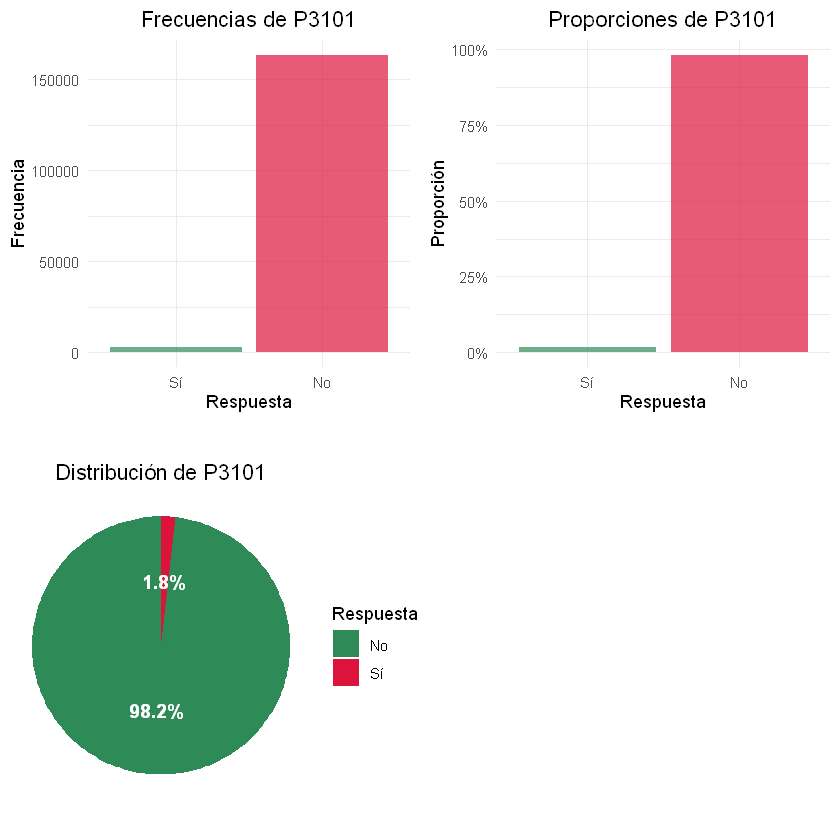

In [4]:
# ---- Celda 3: Análisis Gráfico para Variable Cualitativa --------------
library(ggplot2)
library(gridExtra)

plot_dir <- file.path(out_dir, "plots")
dir.create(plot_dir, showWarnings = FALSE, recursive = TRUE)

x <- df_var$value
x_nm <- x[!is.na(x)]

if (length(x_nm) == 0) {
  message("No hay datos no-missing: no se generan gráficos.")
} else {
  # Preparar datos para gráficos
  df_plot <- df_var %>% 
    filter(!is.na(value)) %>%
    mutate(
      categoria = ifelse(value == 1, "Sí", "No"),
      categoria = factor(categoria, levels = c("Sí", "No"))
    )
  
  # Gráfico de barras (frecuencias)
  p1 <- ggplot(df_plot, aes(x = categoria)) +
    geom_bar(fill = c("#2E8B57", "#DC143C"), alpha = 0.7) +
    labs(
      title = paste("Frecuencias de", varname_real),
      x = "Respuesta",
      y = "Frecuencia"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))
  
  # Gráfico de barras (proporciones)
  p2 <- ggplot(df_plot, aes(x = categoria)) +
    geom_bar(aes(y = ..prop.., group = 1), fill = c("#2E8B57", "#DC143C"), alpha = 0.7) +
    labs(
      title = paste("Proporciones de", varname_real),
      x = "Respuesta",
      y = "Proporción"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_y_continuous(labels = scales::percent_format())
  
  # Gráfico de pastel
  freq_data <- table(df_plot$categoria)
  pie_data <- data.frame(
    categoria = names(freq_data),
    frecuencia = as.numeric(freq_data),
    porcentaje = round(as.numeric(freq_data) / sum(freq_data) * 100, 1)
  )
  
  p3 <- ggplot(pie_data, aes(x = "", y = frecuencia, fill = categoria)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar("y", start = 0) +
    labs(
      title = paste("Distribución de", varname_real),
      fill = "Respuesta"
    ) +
    theme_void() +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_fill_manual(values = c("#2E8B57", "#DC143C")) +
    geom_text(aes(label = paste0(porcentaje, "%")), 
              position = position_stack(vjust = 0.5), 
              color = "white", size = 4, fontface = "bold")
  
  # Guardar gráficos individuales
  ggsave(file.path(plot_dir, paste0("barras_frecuencias_", varname_real, ".png")), p1, width = 8, height = 6)
  ggsave(file.path(plot_dir, paste0("barras_proporciones_", varname_real, ".png")), p2, width = 8, height = 6)
  ggsave(file.path(plot_dir, paste0("pie_chart_", varname_real, ".png")), p3, width = 8, height = 6)
  
  # Mostrar todos los gráficos juntos
  grid.arrange(p1, p2, p3, ncol = 2, nrow = 2)
  
  message("Gráficos guardados en: ", plot_dir)
}


In [5]:
# ---- Celda 4: Intervalos de Confianza para Proporciones ---------------
# Instalar paquete binom si no está disponible
if (!requireNamespace("binom", quietly = TRUE)) {
  install.packages("binom", repos = "https://cloud.r-project.org")
}
library(binom)

x <- df_var$value
x_nm <- x[!is.na(x)]

if (length(x_nm) > 0) {
  # Contar respuestas
  n_total <- length(x_nm)
  n_si <- sum(x_nm == 1)
  n_no <- sum(x_nm == 2)
  
  cat("=== Intervalos de Confianza para Proporciones ===\n")
  cat("Tamaño muestral (n):", n_total, "\n")
  cat("Respuestas 'Sí':", n_si, "\n")
  cat("Respuestas 'No':", n_no, "\n\n")
  
  # Método manual (aproximación normal) - siempre funciona
  p_si <- n_si / n_total
  se_si <- sqrt(p_si * (1 - p_si) / n_total)
  z_critico <- qnorm(0.975)
  
  ic_si_manual <- c(
    max(0, p_si - z_critico * se_si),
    min(1, p_si + z_critico * se_si)
  )
  
  cat("IC 95% para proporción 'Sí' (aproximación normal): [", 
      round(ic_si_manual[1], 4), ", ", 
      round(ic_si_manual[2], 4), "]\n")
  
  # IC para proporción de 'No' (manual)
  p_no <- n_no / n_total
  se_no <- sqrt(p_no * (1 - p_no) / n_total)
  
  ic_no_manual <- c(
    max(0, p_no - z_critico * se_no),
    min(1, p_no + z_critico * se_no)
  )
  
  cat("IC 95% para proporción 'No' (aproximación normal): [", 
      round(ic_no_manual[1], 4), ", ", 
      round(ic_no_manual[2], 4), "]\n")
  
  # Método exacto usando binom.test (función base de R)
  if (n_si > 0 && n_si < n_total) {
    test_si <- binom.test(n_si, n_total, conf.level = 0.95)
    cat("IC 95% para proporción 'Sí' (exacto): [", 
        round(test_si$conf.int[1], 4), ", ", 
        round(test_si$conf.int[2], 4), "]\n")
  }
  
  if (n_no > 0 && n_no < n_total) {
    test_no <- binom.test(n_no, n_total, conf.level = 0.95)
    cat("IC 95% para proporción 'No' (exacto): [", 
        round(test_no$conf.int[1], 4), ", ", 
        round(test_no$conf.int[2], 4), "]\n")
  }
  
  # Método con paquete binom (si está disponible)
  tryCatch({
    if (n_si > 0 && n_si < n_total) {
      ic_si_binom <- binom.confint(n_si, n_total, conf.level = 0.95, methods = "exact")
      cat("IC 95% para proporción 'Sí' (binom package): [", 
          round(ic_si_binom$lower, 4), ", ", 
          round(ic_si_binom$upper, 4), "]\n")
    }
    
    if (n_no > 0 && n_no < n_total) {
      ic_no_binom <- binom.confint(n_no, n_total, conf.level = 0.95, methods = "exact")
      cat("IC 95% para proporción 'No' (binom package): [", 
          round(ic_no_binom$lower, 4), ", ", 
          round(ic_no_binom$upper, 4), "]\n")
    }
  }, error = function(e) {
    cat("Nota: Paquete 'binom' no disponible, usando métodos alternativos.\n")
  })
  
  # Mostrar estimadores puntuales
  cat("\n=== Estimadores Puntuales ===\n")
  cat("Proporción 'Sí':", round(p_si, 4), "(", round(p_si * 100, 2), "%)\n")
  cat("Proporción 'No':", round(1 - p_si, 4), "(", round((1 - p_si) * 100, 2), "%)\n")
  
  # Error estándar
  cat("Error estándar 'Sí':", round(se_si, 4), "\n")
  cat("Error estándar 'No':", round(se_no, 4), "\n")
  
} else {
  cat("No hay datos válidos para calcular intervalos de confianza.\n")
}


=== Intervalos de Confianza para Proporciones ===
Tamaño muestral (n): 166341 
Respuestas 'Sí': 2918 
Respuestas 'No': 163423 

IC 95% para proporción 'Sí' (aproximación normal): [ 0.0169 ,  0.0182 ]
IC 95% para proporción 'No' (aproximación normal): [ 0.9818 ,  0.9831 ]
IC 95% para proporción 'Sí' (exacto): [ 0.0169 ,  0.0182 ]
IC 95% para proporción 'No' (exacto): [ 0.9818 ,  0.9831 ]
IC 95% para proporción 'Sí' (binom package): [ 0.0169 ,  0.0182 ]
IC 95% para proporción 'No' (binom package): [ 0.9818 ,  0.9831 ]

=== Estimadores Puntuales ===
Proporción 'Sí': 0.0175 ( 1.75 %)
Proporción 'No': 0.9825 ( 98.25 %)
Error estándar 'Sí': 3e-04 
Error estándar 'No': 3e-04 


In [6]:
# ---- Celda 5: Bootstrap para Proporciones (SUPER RÁPIDO) --------------
set.seed(12345)

x <- df_var$value
x_nm <- x[!is.na(x)]

if (length(x_nm) > 10) {
  B <- 50  # Solo 50 réplicas para máxima velocidad
  
  cat("=== Bootstrap para Proporciones (RÁPIDO) ===\n")
  cat("Número de réplicas bootstrap:", B, "\n")
  cat("Proporción original 'Sí':", round(mean(x_nm == 1), 4), "\n")
  
  # Bootstrap manual ultra-rápido
  n_total <- length(x_nm)
  n_si <- sum(x_nm == 1)
  
  # Generar todas las muestras bootstrap de una vez
  bootstrap_samples <- matrix(sample(x_nm, size = B * n_total, replace = TRUE), 
                             nrow = B, ncol = n_total)
  
  # Calcular proporciones para cada muestra bootstrap (vectorizado)
  prop_bootstrap <- rowMeans(bootstrap_samples == 1)
  
  # Calcular estadísticas bootstrap
  mean_boot <- mean(prop_bootstrap)
  sd_boot <- sd(prop_bootstrap)
  bias_boot <- mean_boot - (n_si / n_total)
  
  # Intervalos de confianza bootstrap (percentil)
  ci_percentil <- quantile(prop_bootstrap, c(0.025, 0.975))
  
  # Mostrar resultados
  cat("IC 95% bootstrap (percentil) para 'Sí': [", 
      round(ci_percentil[1], 4), ", ", 
      round(ci_percentil[2], 4), "]\n")
  
  cat("Bias estimado (bootstrap):", round(bias_boot, 6), "\n")
  
  # Estadísticas de la distribución bootstrap
  cat("\nEstadísticas distribución bootstrap:\n")
  cat("Media bootstrap:", round(mean_boot, 4), "\n")
  cat("Desv. estándar bootstrap:", round(sd_boot, 4), "\n")
  cat("Percentiles (2.5%, 50%, 97.5%):", 
      round(quantile(prop_bootstrap, c(0.025, 0.5, 0.975)), 4), "\n")
  
  # Comparación con método teórico
  p_original <- n_si / n_total
  se_teorico <- sqrt(p_original * (1 - p_original) / n_total)
  cat("\nComparación con método teórico:\n")
  cat("Error estándar teórico:", round(se_teorico, 4), "\n")
  cat("Error estándar bootstrap:", round(sd_boot, 4), "\n")
  cat("Diferencia relativa:", round(abs(sd_boot - se_teorico) / se_teorico * 100, 2), "%\n")
  
} else {
  cat("No hay suficientes datos para bootstrap (n < 10).\n")
}


=== Bootstrap para Proporciones (RÁPIDO) ===
Número de réplicas bootstrap: 50 
Proporción original 'Sí': 0.0175 
IC 95% bootstrap (percentil) para 'Sí': [ 0.017 ,  0.0179 ]
Bias estimado (bootstrap): -5.7e-05 

Estadísticas distribución bootstrap:
Media bootstrap: 0.0175 
Desv. estándar bootstrap: 3e-04 
Percentiles (2.5%, 50%, 97.5%): 0.017 0.0175 0.0179 

Comparación con método teórico:
Error estándar teórico: 3e-04 
Error estándar bootstrap: 3e-04 
Diferencia relativa: 8.26 %


       n  var_prop_si  var_prop_no
1     50 3.796611e-04 3.796611e-04
2  23805 6.071111e-07 6.071111e-07
3  47561 2.508028e-07 2.508028e-07
4  71317 1.469792e-07 1.469792e-07
5  95073 7.252299e-08 7.252299e-08
6 118829 4.798046e-08 4.798046e-08
7 142585 1.840173e-08 1.840173e-08
8 166341 0.000000e+00 0.000000e+00


Gráfico de consistencia guardado en: analisis_P3101_cualitativa/consistencia_var_vs_n_cualitativa.png




Comentario (Consistencia):
Si la varianza del estimador (proporción) disminuye al crecer n, evidencia consistencia.
Para variables cualitativas, la consistencia se evalúa en términos de la estabilidad
de las estimaciones de proporciones cuando aumenta el tamaño muestral.


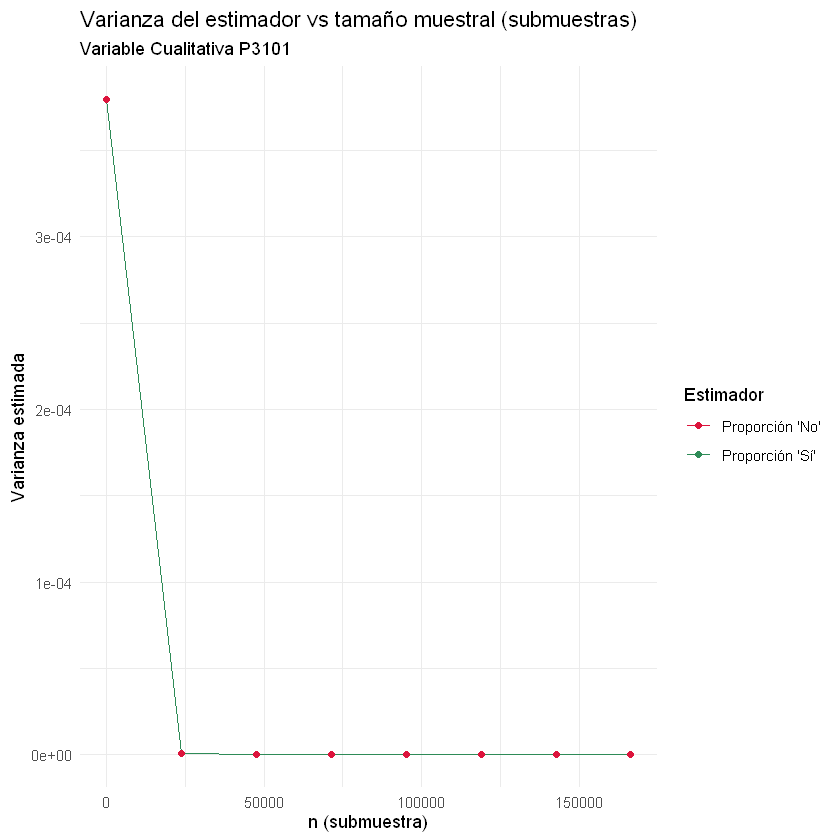

In [9]:
# ---- Celda 6: Consistencia para Variable Cualitativa ------------------
library(dplyr)
set.seed(123)

x <- df_var$value
x_nm <- x[!is.na(x)]

if (length(x_nm) > 30) {
  # Tamaños de submuestra
  ns <- unique(floor(seq(50, length(x_nm), length.out = 8)))
  reps <- 300  # repeticiones por tamaño
  
  res <- data.frame(
    n = integer(), 
    var_prop_si = numeric(), 
    var_prop_no = numeric()
  )
  
  for (n in ns) {
    ests_prop_si <- numeric(reps)
    ests_prop_no <- numeric(reps)
    
    for (r in 1:reps) {
      s <- sample(x_nm, size = n, replace = FALSE)
      ests_prop_si[r] <- mean(s == 1)
      ests_prop_no[r] <- mean(s == 2)
    }
    
    res <- rbind(res, data.frame(
      n = n, 
      var_prop_si = var(ests_prop_si), 
      var_prop_no = var(ests_prop_no)
    ))
  }
  
  print(res)
  
  # Gráfico de varianza vs n
  library(ggplot2)
  
  # Preparar datos para gráfico
  res_long <- res %>%
    tidyr::pivot_longer(cols = c(var_prop_si, var_prop_no), 
                        names_to = "estimador", 
                        values_to = "varianza")
  
  pcons <- ggplot(res_long, aes(x = n, y = varianza, color = estimador)) +
    geom_line() +
    geom_point() +
    labs(
      title = "Varianza del estimador vs tamaño muestral (submuestras)",
      subtitle = "Variable Cualitativa P3101",
      x = "n (submuestra)", 
      y = "Varianza estimada",
      color = "Estimador"
    ) +
    theme_minimal() +
    scale_color_manual(
      labels = c("Proporción 'No'", "Proporción 'Sí'"),
      values = c("#DC143C", "#2E8B57")
    )
  
  print(pcons)
  ggsave(filename = file.path(out_dir, "consistencia_var_vs_n_cualitativa.png"), 
         plot = pcons, width = 10, height = 6)
  
  message("Gráfico de consistencia guardado en: ", 
          file.path(out_dir, "consistencia_var_vs_n_cualitativa.png"))
  
  cat("\nComentario (Consistencia):\n")
  cat("Si la varianza del estimador (proporción) disminuye al crecer n, evidencia consistencia.\n")
  cat("Para variables cualitativas, la consistencia se evalúa en términos de la estabilidad\n")
  cat("de las estimaciones de proporciones cuando aumenta el tamaño muestral.\n")
  
} else {
  cat("No hay suficientes datos (>30) para estudiar consistencia por submuestreo.\n")
}


In [8]:
# ---- Celda 7: Eficiencia y Resumen Final ------------------------------
library(dplyr)
set.seed(42)

x <- df_var$value
x_nm <- x[!is.na(x)]

if (length(x_nm) > 10) {
  # Para variables cualitativas, la eficiencia se puede evaluar comparando
  # la varianza de diferentes estimadores de proporción
  
  B <- 1000
  
  # Bootstrap para proporción de 'Sí'
  boot_prop_si <- boot(x_nm, 
                       statistic = function(d, i) mean(d[i] == 1), 
                       R = B)
  
  # Bootstrap para proporción de 'No'
  boot_prop_no <- boot(x_nm, 
                       statistic = function(d, i) mean(d[i] == 2), 
                       R = B)
  
  var_prop_si <- var(boot_prop_si$t)
  var_prop_no <- var(boot_prop_no$t)
  
  cat("=== Eficiencia (empírica via bootstrap) ===\n")
  cat("Var(proporción 'Sí') bootstrap:", round(var_prop_si, 6), "\n")
  cat("Var(proporción 'No') bootstrap:", round(var_prop_no, 6), "\n")
  
  # Para variables cualitativas binarias, las varianzas deberían ser iguales
  # (ya que p + q = 1, entonces Var(p) = Var(1-p) = Var(q))
  cat("\nComentario (Eficiencia):\n")
  cat("Para variables cualitativas binarias, ambos estimadores (proporción 'Sí' y 'No')\n")
  cat("tienen la misma eficiencia teórica, ya que son complementarios (p + q = 1).\n")
  
} else {
  cat("No hay suficientes datos para evaluar eficiencia.\n")
}

# Resumen final y sintaxis
cat("\n=== Resumen del Análisis ===\n")
cat("Variable analizada:", varname_real, "\n")
cat("Tipo: Cualitativa nominal (binaria)\n")
cat("Codificación: 1 = Sí, 2 = No\n")
cat("Total observaciones:", length(x), "\n")
cat("Observaciones válidas:", length(x_nm), "\n")
cat("Porcentaje missing:", round(sum(is.na(x))/length(x)*100, 2), "%\n")

if (length(x_nm) > 0) {
  prop_si <- mean(x_nm == 1)
  cat("Proporción 'Sí':", round(prop_si, 4), "(", round(prop_si*100, 2), "%)\n")
  cat("Proporción 'No':", round(1-prop_si, 4), "(", round((1-prop_si)*100, 2), "%)\n")
}

cat("\n--- Sintaxis clave usada en este análisis ---\n")
cat("1) Limpieza categórica: clean_categorical(...)\n")
cat("2) Descriptivos: table(), prop.table() para frecuencias y proporciones\n")
cat("3) Gráficas: geom_bar(), coord_polar() para barras y pie charts\n")
cat("4) IC proporciones: binom.confint() (exacto y asintótico)\n")
cat("5) Bootstrap: boot() para IC y bias de proporciones\n")
cat("6) Consistencia: submuestreo comparando var(proporción) vs n\n")
cat("7) Eficiencia: comparar var_bootstrap(proporción)\n")
cat("\nArchivos generados en:", out_dir, "\n")


ERROR: Error in boot(x_nm, statistic = function(d, i) mean(d[i] == 1), R = B): no se pudo encontrar la función "boot"
